# 딥러닝: 회귀분석

김보람  
2023-04-20

# ref

-   [파이썬 데이터 분석](http://www.yes24.com/Product/Goods/108023856)

# 보스톤 주택가격 예측

1.  보스톤 주택가격 데이터 세트와 모형 구조

-   비선형 회귀분석의 경우 인공신경망 구조는 1개 이상의 은닉충 필요

-   주택가격(mediv)을 출력노드, 주택가격에 영향을 미치는 나머지
    독립변수는 입력노드

-   0과 1사이의 값을 가지는 더미 변수 chas는 제외

1.  활성화함수

-   딥러닝의 경우 ReLU 함수 설정하지만 회귀분석의 경우 출력 노드에는
    설정 하지 않아도 되고 $a(x)=x$와 같이 선형함수가 활성화함수가 됨

1.  비용함수

-   $MSE=\dfrac{1}{n}\sum_{i=1}^n (y_i - \widehat y_i)^2$

1.  최적화 기법

-   Adam 사용

1.  테스트 및 평가

-   평균절대오차 $MAE=\dfrac{1}{n}\sum_{i=1}^n |y_i - \widehat y_i|^2$

## 1. 패키지 설정

sklearn에서 2.1 이후로 해당 데이터는 사용할 수 없다.

``` python
from sklearn.datasets import load_boston
```

In this special case, you can fetch the dataset from the original
source::

``` python
    import pandas as pd
    import numpy as np

    data_url = "http://lib.stat.cmu.edu/datasets/boston"
    raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
    data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
    target = raw_df.values[1::2, 2]
```

In [38]:

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split  #학습용과 테스트용 분리
from sklearn.metrics import mean_absolute_error       #정규화
#딥러닝 모형화를 위해 keras를 사용
from keras.models import Sequential                   #Sequential 한층씩 추가하여 네트워크를 만든다.    
from keras.layers import Dense                        #Dense 층 간 노드들은 모두 연결되는 모형구조를 만든다.

import seaborn as sns
import matplotlib.pyplot as plt

In [39]:
import pandas as pd
import numpy as np

data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22)
data = raw_df.values[:, :-1]
target = raw_df.values[:, -1]


In [40]:
import pandas as pd
import numpy as np

data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=21, header=None)

# 데이터셋에서 14번째 변수(MEDV)는 target 변수로 사용
# 데이터와 target을 분리
data2 = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :3]])

feautre_names=['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT']
# 데이터셋의 크기를 확인
print(data2.shape)  # (506, 14)


(506, 14)

In [41]:
data=data2[:,:-1]
target=data2[:,-1]

print(data.shape)  # (506, 13)
print(target.shape)  # (506,)


(506, 13)
(506,)

## 2. 데이터준비

In [42]:
X=pd.DataFrame(data, columns=feautre_names)
print(X)

        CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0    0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1    0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2    0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3    0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4    0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...    ...   
501  0.06263   0.0  11.93   0.0  0.573  6.593  69.1  2.4786  1.0  273.0   
502  0.04527   0.0  11.93   0.0  0.573  6.120  76.7  2.2875  1.0  273.0   
503  0.06076   0.0  11.93   0.0  0.573  6.976  91.0  2.1675  1.0  273.0   
504  0.10959   0.0  11.93   0.0  0.573  6.794  89.3  2.3889  1.0  273.0   
505  0.04741   0.0  11.93   0.0  0.573  6.030  80.8  2.5050  1.0  273.0   

     PTRATIO       B  LSTAT  
0       15.3  396.90   4.98  
1       17.8  396.90   9.14  
2       1

`-` 더미 변수 CHAS제외

In [43]:
X=X.drop(['CHAS'],axis=1)
print(X.head())

      CRIM    ZN  INDUS    NOX     RM   AGE     DIS  RAD    TAX  PTRATIO  \
0  0.00632  18.0   2.31  0.538  6.575  65.2  4.0900  1.0  296.0     15.3   
1  0.02731   0.0   7.07  0.469  6.421  78.9  4.9671  2.0  242.0     17.8   
2  0.02729   0.0   7.07  0.469  7.185  61.1  4.9671  2.0  242.0     17.8   
3  0.03237   0.0   2.18  0.458  6.998  45.8  6.0622  3.0  222.0     18.7   
4  0.06905   0.0   2.18  0.458  7.147  54.2  6.0622  3.0  222.0     18.7   

        B  LSTAT  
0  396.90   4.98  
1  396.90   9.14  
2  392.83   4.03  
3  394.63   2.94  
4  396.90   5.33  

In [44]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 12 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   NOX      506 non-null    float64
 4   RM       506 non-null    float64
 5   AGE      506 non-null    float64
 6   DIS      506 non-null    float64
 7   RAD      506 non-null    float64
 8   TAX      506 non-null    float64
 9   PTRATIO  506 non-null    float64
 10  B        506 non-null    float64
 11  LSTAT    506 non-null    float64
dtypes: float64(12)
memory usage: 47.6 KB

In [45]:
y=pd.DataFrame(target)
print(y)

        0
0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
..    ...
501  22.4
502  20.6
503  23.9
504  22.0
505  11.9

[506 rows x 1 columns]

## 3. 탐색적 데이터 분석

In [49]:
boston_df=pd.DataFrame(data=X)
boston_df["MEDIV"]=target
print(boston_df)

        CRIM    ZN  INDUS    NOX     RM   AGE     DIS  RAD    TAX  PTRATIO  \
0    0.00632  18.0   2.31  0.538  6.575  65.2  4.0900  1.0  296.0     15.3   
1    0.02731   0.0   7.07  0.469  6.421  78.9  4.9671  2.0  242.0     17.8   
2    0.02729   0.0   7.07  0.469  7.185  61.1  4.9671  2.0  242.0     17.8   
3    0.03237   0.0   2.18  0.458  6.998  45.8  6.0622  3.0  222.0     18.7   
4    0.06905   0.0   2.18  0.458  7.147  54.2  6.0622  3.0  222.0     18.7   
..       ...   ...    ...    ...    ...   ...     ...  ...    ...      ...   
501  0.06263   0.0  11.93  0.573  6.593  69.1  2.4786  1.0  273.0     21.0   
502  0.04527   0.0  11.93  0.573  6.120  76.7  2.2875  1.0  273.0     21.0   
503  0.06076   0.0  11.93  0.573  6.976  91.0  2.1675  1.0  273.0     21.0   
504  0.10959   0.0  11.93  0.573  6.794  89.3  2.3889  1.0  273.0     21.0   
505  0.04741   0.0  11.93  0.573  6.030  80.8  2.5050  1.0  273.0     21.0   

          B  LSTAT  MEDIV  
0    396.90   4.98   24.0  
1    39

`-` 히스토그램

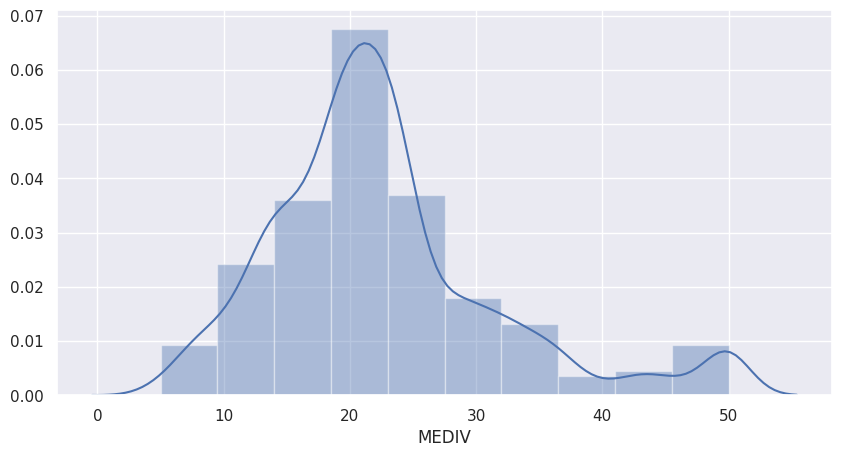

In [51]:
#목표변수 값 히스토그램
sns.set(rc={'figure.figsize':(10,5)})
sns.distplot(boston_df['MEDIV'],bins=10)
plt.show()

`-` 상관계수

In [54]:
# 각 변수별 상관계수
correlation_matrix=boston_df.corr().round(2)
correlation_matrix

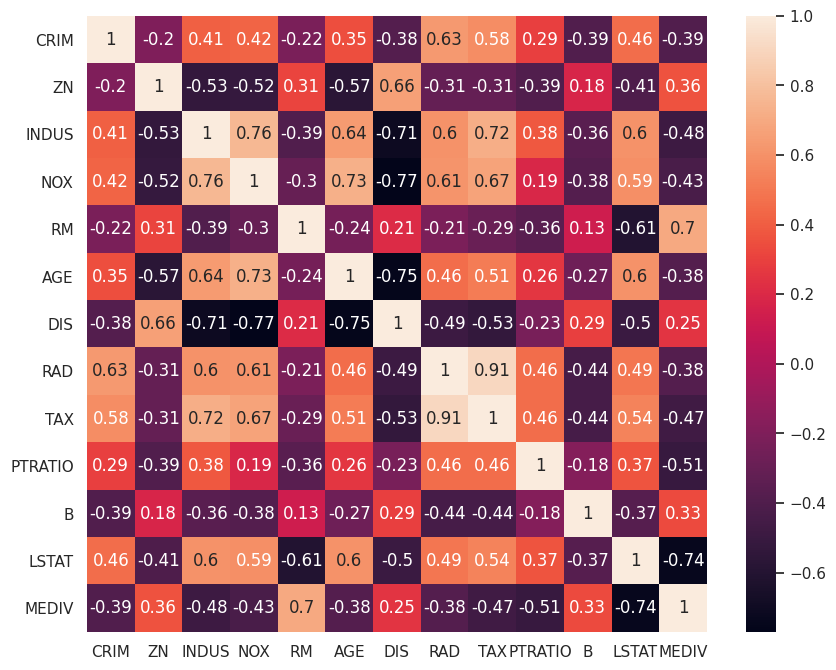

In [56]:
sns.set(rc={'figure.figsize':(10,8)})
sns.heatmap(data=correlation_matrix,annot=True)
plt.show()

## 4. 데이터분리

-   학습용과 테스트용 데이터를 7:3으로 분리하자.

In [97]:
X.shape

In [99]:
X=X.drop(['MEDIV'],axis=1)
X

In [100]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)

## 5. 피처 스케일링

-   학습용 입력 데이터에 대한 정규화 스케일러 만들고 입력데이터를 0~1로
    정규화하기

In [101]:
# 정규화 스케일러 생성
scalerX=MinMaxScaler()

# 정규화 스케일러를 학습용 데이터에 맞춤
scalerX.fit(X_train)

# 정규화 스케일러로 학습용 데이터 변환
X_train_norm=scalerX.transform(X_train)

# 정규화 스케일러로 테스트용 데이터 변환
X_test_norm = scalerX.transform(X_test)

In [102]:
print(X_train_norm)

[[0.00680253 0.2        0.11962963 ... 0.04255319 0.98184477 0.08724646]
 [0.07235853 0.         0.64296296 ... 0.80851064 0.24617984 0.27924423]
 [0.1610363  0.         0.64296296 ... 0.80851064 0.93953301 0.7957766 ]
 ...
 [0.11494542 0.         0.64296296 ... 0.80851064 0.95662918 0.44595721]
 [0.1717624  0.         0.64296296 ... 0.80851064 0.91456957 0.59071964]
 [0.00187693 0.         0.33148148 ... 0.70212766 1.         0.27868852]]

In [103]:
X_train_norm.shape

In [104]:
print(X_test_norm)

[[ 2.05400974e-02  0.00000000e+00  6.97777778e-01 ...  2.23404255e-01
   9.81617832e-01 -1.66712976e-03]
 [ 1.09008802e-02  0.00000000e+00  7.83333333e-01 ...  9.14893617e-01
   6.61758031e-01  4.25951653e-01]
 [ 4.66707160e-01  0.00000000e+00  6.42962963e-01 ...  8.08510638e-01
   8.29946039e-01  7.05751598e-01]
 ...
 [ 1.61036297e-01  0.00000000e+00  6.42962963e-01 ...  8.08510638e-01
   9.65757224e-01  3.09252570e-01]
 [ 9.47848868e-04  2.00000000e-01  2.30370370e-01 ...  6.38297872e-01
   9.85980130e-01  3.24256738e-01]
 [ 4.01371790e-04  2.80000000e-01  5.29629630e-01 ...  5.95744681e-01
   9.95234253e-01  1.71714365e-01]]

In [105]:
X_test_norm.shape

In [106]:
# 정규화 스케일러 생성
scalerY=MinMaxScaler()

# 정규화 스케일러를 학습용 데이터에 맞춤
scalerY.fit(y_train)

# 정규화 스케일러로 학습용 데이터 변환
y_train_norm=scalerY.transform(y_train)

# 정규화 스케일러로 테스트용 데이터 변환
y_test_norm = scalerY.transform(y_test)

In [107]:
print(y_train_norm[0:10])

[[1.        ]
 [0.24666667]
 [0.11555556]
 [0.3       ]
 [0.17111111]
 [0.30888889]
 [0.28444444]
 [0.32666667]
 [0.33111111]
 [0.52444444]]

In [108]:
y_train_norm.shape

In [109]:
print(y_test_norm[0:10])

[[1.        ]
 [0.23555556]
 [0.07777778]
 [0.12222222]
 [0.53555556]
 [0.92666667]
 [0.40222222]
 [0.58      ]
 [0.57333333]
 [0.34888889]]

In [110]:
y_test_norm.shape

## 6. 모형화 및 학습

In [111]:
model=Sequential() # 순차모형
model.add(Dense(60,activation='relu', input_shape=(12,))) # 제 1은닉충과 입력층
model.add(Dense(60,activation='relu')) # 제 2은닉충
model.add(Dense(30,activation='relu')) # 제 3은닉충
model.add(Dense(1)) # 출력층 (선형 활섬화함수)

In [112]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 60)                780       
                                                                 
 dense_13 (Dense)            (None, 60)                3660      
                                                                 
 dense_14 (Dense)            (None, 30)                1830      
                                                                 
 dense_15 (Dense)            (None, 1)                 31        
                                                                 
Total params: 6,301
Trainable params: 6,301
Non-trainable params: 0
_________________________________________________________________

-   Param : 가중치 12x60=720, 편향:60

In [113]:
model.compile(optimizer='adam',
              loss='mse',
              metrics=['mae'])

`-` 학습

In [114]:
results=model.fit(X_train_norm, y_train_norm,
                  validation_data=(X_test_norm, y_test_norm),
                  epochs=200, batch_size=32)

Epoch 1/200
12/12 [==============================] - 0s 7ms/step - loss: 0.1031 - mae: 0.2534 - val_loss: 0.0570 - val_mae: 0.1836
Epoch 2/200
12/12 [==============================] - 0s 2ms/step - loss: 0.0472 - mae: 0.1690 - val_loss: 0.0401 - val_mae: 0.1482
Epoch 3/200
12/12 [==============================] - 0s 2ms/step - loss: 0.0326 - mae: 0.1291 - val_loss: 0.0295 - val_mae: 0.1203
Epoch 4/200
12/12 [==============================] - 0s 2ms/step - loss: 0.0244 - mae: 0.1095 - val_loss: 0.0234 - val_mae: 0.1124
Epoch 5/200
12/12 [==============================] - 0s 2ms/step - loss: 0.0224 - mae: 0.1113 - val_loss: 0.0205 - val_mae: 0.0991
Epoch 6/200
12/12 [==============================] - 0s 2ms/step - loss: 0.0176 - mae: 0.0876 - val_loss: 0.0162 - val_mae: 0.0880
Epoch 7/200
12/12 [==============================] - 0s 2ms/step - loss: 0.0144 - mae: 0.0785 - val_loss: 0.0135 - val_mae: 0.0801
Epoch 8/200
12/12 [==============================] - 0s 2ms/step - loss: 0.0123 - m

In [115]:
print(results.history.keys())

dict_keys(['loss', 'mae', 'val_loss', 'val_mae'])

-   loss : 학습 데이터 비용

-   mae : 학습 데이터 오차

-   val_loss : 테스트 데이터 비용

-   val_mae : 테스트 데이터 오차

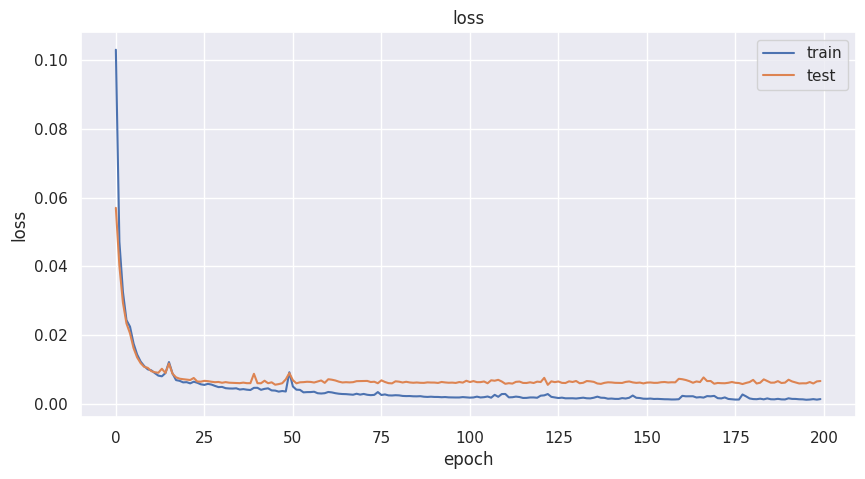

In [118]:
# 학습 수에 따른 loss 변화
plt.figure(figsize=(10,5))
plt.plot(results.history['loss']) 
plt.plot(results.history['val_loss'])
plt.title('loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','test'],loc='upper right')
plt.show()

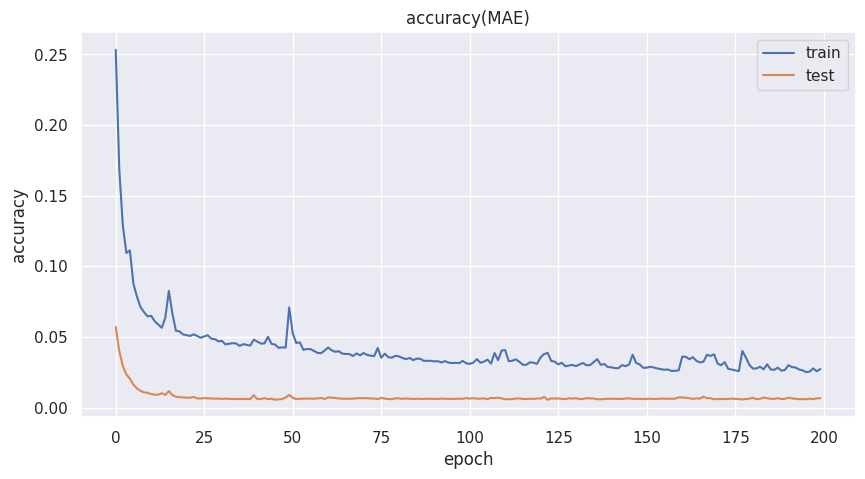

In [119]:
# 학습 수에 따른 정확도(mae) 변화
plt.figure(figsize=(10,5))
plt.plot(results.history['mae']) 
plt.plot(results.history['val_loss'])
plt.title('accuracy(MAE)')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train','test'],loc='upper right')
plt.show()

## 7. 예측

In [120]:
# 테스트 데이터 예측
y_pred=model.predict(X_test_norm).flatten()

# 예측 값의 역변환
y_pred_inverse=scalerY.inverse_transform(y_pred.reshape(-1,1))
print(y_pred_inverse[0:10])

5/5 [==============================] - 0s 540us/step
[[50.411358 ]
 [13.942274 ]
 [ 6.1426053]
 [10.471625 ]
 [30.684546 ]
 [44.55355  ]
 [26.434183 ]
 [31.944752 ]
 [32.296173 ]
 [23.545477 ]]

In [123]:
# 오차측정(MAE)
print('MAE:%.2f' %mean_absolute_error(y_test, y_pred_inverse))

MAE:2.28

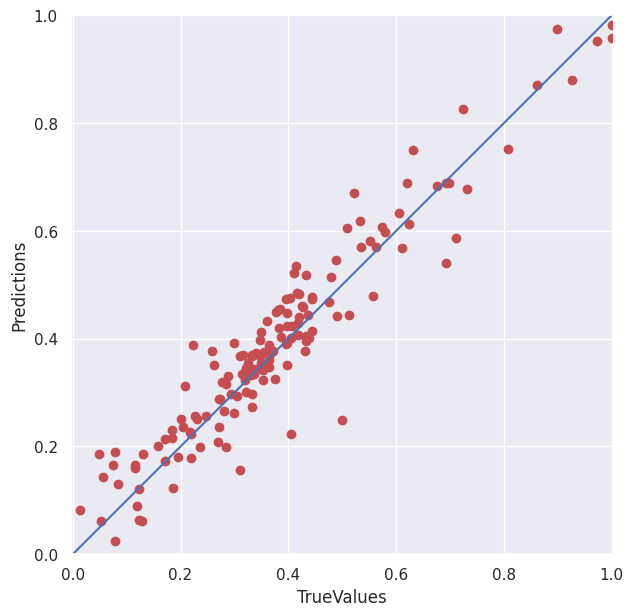

In [124]:
# 실제 값 대비 예측 값의 산포도
plt.figure(figsize=(7,7))
plt.scatter(y_test_norm,y_pred,c='r')
plt.xlabel('TrueValues')
plt.ylabel('Predictions')
plt.axis('equal')
plt.xlim(0,1)
plt.ylim(0,1)
plt.plot([0,1],[0,1])
plt.show()

## 8. 드랍아웃 모형 추가

In [125]:
from keras.layers import Dropout

In [137]:
model=Sequential() # 순차모형
model.add(Dense(60,activation='relu', input_shape=(12,))) # 제 1은닉충과 입력층
model.add(Dropout(0.5)) # 제 1은닉충과 2은닉충 사이의 드롭 아웃 50%
model.add(Dense(60,activation='relu')) # 제 2은닉충
model.add(Dense(30,activation='relu')) # 제 3은닉충
model.add(Dropout(0.2)) # 제 3은닉충과 출력층 사이의 드롭 아웃 20%
model.add(Dense(1)) # 출력층 (선형 활섬화함수)

In [138]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_20 (Dense)            (None, 60)                780       
                                                                 
 dropout_2 (Dropout)         (None, 60)                0         
                                                                 
 dense_21 (Dense)            (None, 60)                3660      
                                                                 
 dense_22 (Dense)            (None, 30)                1830      
                                                                 
 dropout_3 (Dropout)         (None, 30)                0         
                                                                 
 dense_23 (Dense)            (None, 1)                 31        
                                                                 
Total params: 6,301
Trainable params: 6,301
Non-traina

In [139]:
model.compile(optimizer='adam',
              loss='mse',
              metrics=['mae'])

In [143]:
# results=model.fit(X_train_norm, y_train_norm,
#                   validation_data=(X_test_norm, y_test_norm),
#                   epochs=1000, batch_size=20)

In [141]:
print(results.history.keys())

dict_keys(['loss', 'mae', 'val_loss', 'val_mae'])

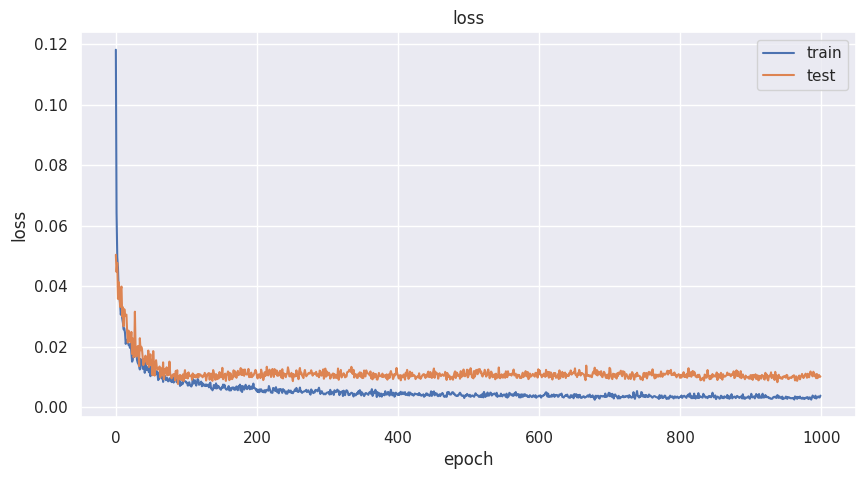

In [142]:
# 학습 수에 따른 loss 변화
plt.figure(figsize=(10,5))
plt.plot(results.history['loss']) 
plt.plot(results.history['val_loss'])
plt.title('loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','test'],loc='upper right')
plt.show()

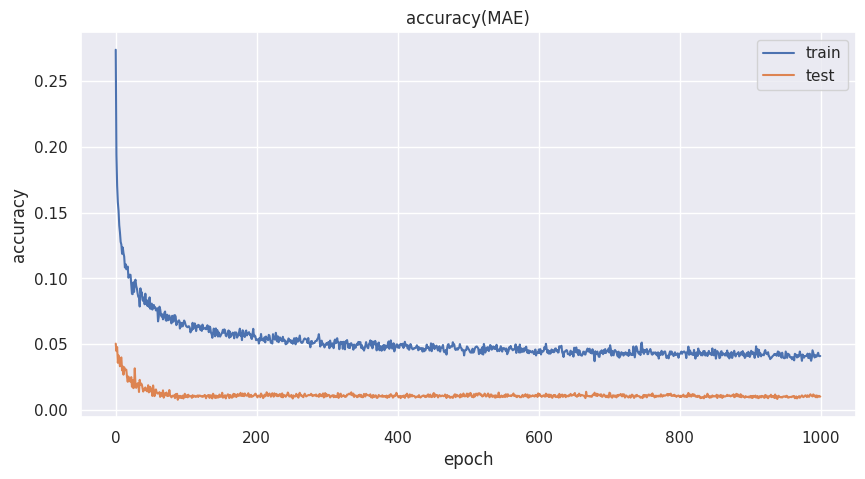

In [144]:
# 학습 수에 따른 정확도(mae) 변화
plt.figure(figsize=(10,5))
plt.plot(results.history['mae']) 
plt.plot(results.history['val_loss'])
plt.title('accuracy(MAE)')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train','test'],loc='upper right')
plt.show()

In [145]:
# 테스트 데이터 예측
y_pred=model.predict(X_test_norm).flatten()

# 예측 값의 역변환
y_pred_inverse=scalerY.inverse_transform(y_pred.reshape(-1,1))
print(y_pred_inverse[0:10])

5/5 [==============================] - 0s 517us/step
[[36.150234]
 [15.184836]
 [ 8.98333 ]
 [12.427422]
 [26.98419 ]
 [34.612114]
 [20.946304]
 [27.669504]
 [28.082466]
 [23.544407]]

In [146]:
# 오차측정(MAE)
print('MAE:%.2f' %mean_absolute_error(y_test, y_pred_inverse))

MAE:3.00

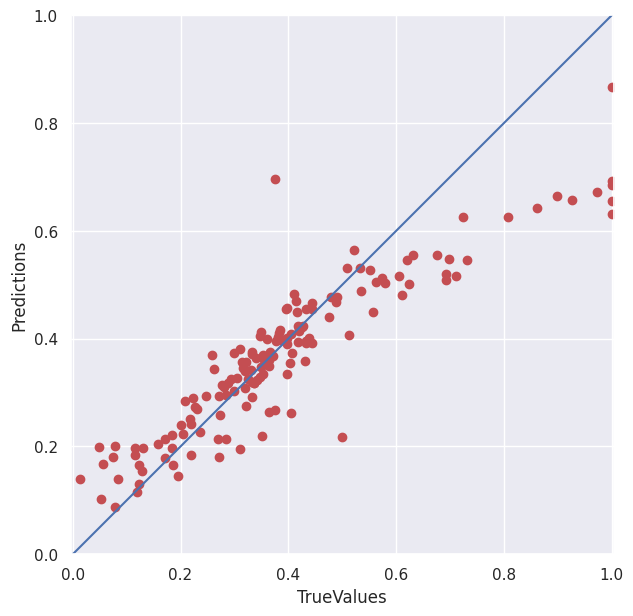

In [147]:
# 실제 값 대비 예측 값의 산포도
plt.figure(figsize=(7,7))
plt.scatter(y_test_norm,y_pred,c='r')
plt.xlabel('TrueValues')
plt.ylabel('Predictions')
plt.axis('equal')
plt.xlim(0,1)
plt.ylim(0,1)
plt.plot([0,1],[0,1])
plt.show()

## 9. 입력 노드의 드랍 아웃

``` python
model=Sequential() # 순차모형
model.add(Dropout(0.2, input_shape=(12,))) # 입력 노드에 대한 드랍아웃 비율 0.2
model.add(Dense(60,activation='relu', input_shape=(12,))) # 제 1은닉충과 입력층
model.add(Dense(60,activation='relu')) # 제 2은닉충
model.add(Dense(30,activation='relu')) # 제 3은닉충
model.add(Dense(1)) # 출력층 (선형 활섬화함수)
```